![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from livelossplot import PlotLossesKeras
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.metrics import MeanAbsoluteError, MeanSquaredError
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD

In [3]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


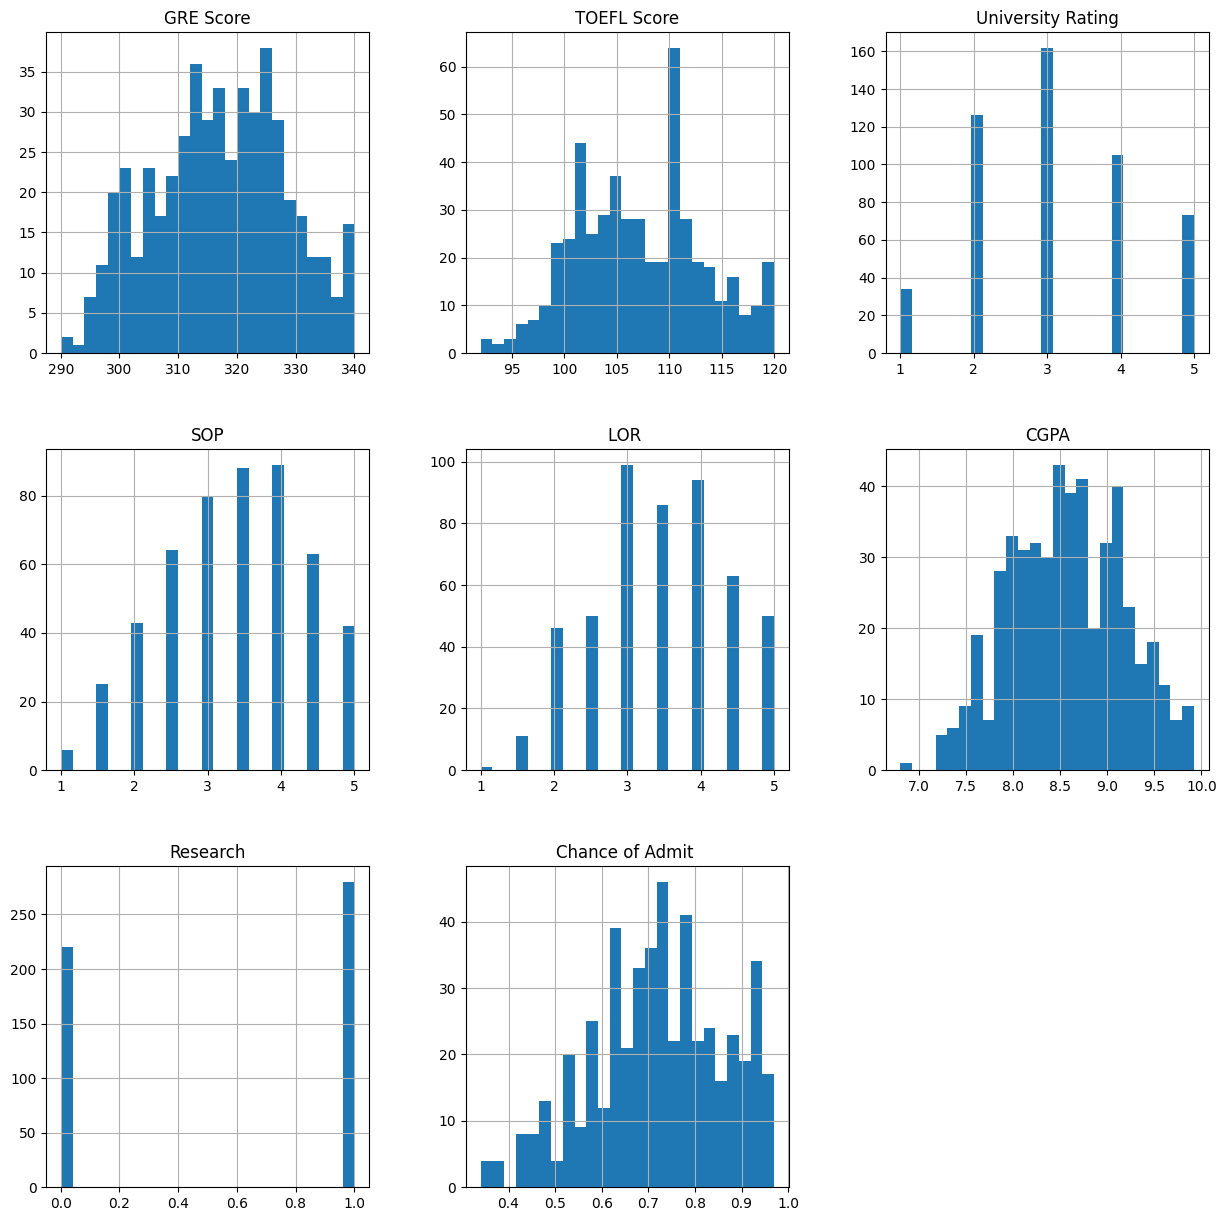

In [4]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [5]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [6]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

<p style="text-align: justify;">
Teniendo en cuenta que las redes neuronales son modelos sensibles a las escalas de las variables. Se usa StandardScaler para transformar las variables numéricas. En este contexto se excluye del escalamiento la variable binaria Research. Cabe resaltar que las variables categóricas University Rating, SOP y LOR. Sí fueron incluidas, dado que representan un orden lógico (1 es bajo y 5 es alto) y fueron tratadas como variables numéricas.<p>

In [7]:
# Normalización de los datos con StandardScaler
columns_scale = xTrain.drop(columns=['Research']).columns

scaler = StandardScaler()
xTrain_scaled = scaler.fit_transform(xTrain[columns_scale])
xTest_scaled = scaler.transform(xTest[columns_scale])

# Convertir el resultado en un DataFrame
xTrain_scaled = pd.DataFrame(xTrain_scaled, columns=columns_scale, index=xTrain.index)
xTest_scaled = pd.DataFrame(xTest_scaled, columns=columns_scale, index=xTest.index)

# Agragar la variable Reasearch al DataFrame
xTrain_scaled['Research'] = xTrain['Research']
xTest_scaled['Research'] = xTest['Research']

# Convertir los datos a numpy array para facilitar el uso en Keras y otras librerías
xTrain_scaled = np.array(xTrain_scaled)
xTest_scaled = np.array(xTest_scaled)
yTrain = np.array(yTrain)
yTest = np.array(yTest)

In [11]:
print(xTrain_scaled.shape)
print(xTest_scaled.shape)

(350, 7)
(150, 7)


## Punto 1 - Red Neuronal de una capa


En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

<p style="text-align: justify;">
Para el desarrollo de los puntos de 1 al 3 se resalta que usó diversas herramientas de inteligencia artificial, incluyendo Chat GPT y Copilot de forma que siriviera de validador y guía en la construcción de estos procedimientos.<p>

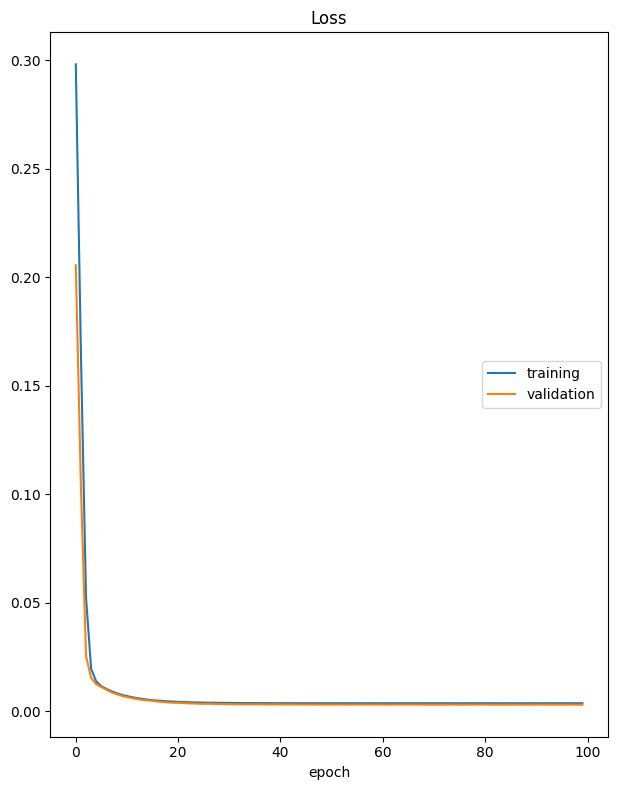

Loss
	training         	 (min:    0.004, max:    0.298, cur:    0.004)
	validation       	 (min:    0.003, max:    0.206, cur:    0.003)


In [12]:
modelo = Sequential()

# Definición de la capa
capa = Dense(units=1, 
             input_dim=xTrain_scaled.shape[1],
             activation='relu', 
             kernel_initializer=initializers.RandomNormal(stddev=0.01), 
             )
modelo.add(capa)

# Definición de la funcion de pérdida y optimizador
modelo.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01))

# Entrenamiento del modelo
RedKeras = modelo.fit(xTrain_scaled, yTrain, 
                      epochs=100, 
                      batch_size=10, 
                      verbose=0,
                      validation_data=(xTest_scaled, yTest),
                      callbacks=[PlotLossesKeras()]
                      )

En esta red neuronal de una sola capa, usamos como función de pérdida el MSE, el optimizador fue el Stochastic Gradient Descent (SGD) y entrenamos el modelo durante 100 épocas. Estos valores los decidimos basándonos en lo que aprendimos en clase y en lo que investigamos por nuestra cuenta.

Para la función de pérdida, escogimos el MSE porque es una forma común de medir qué tan bien está prediciendo nuestro modelo en problemas donde queremos predecir un número continuo, como en este caso la probabilidad de admisión. El MSE se estima calculando la diferencia entre la predicción y el valor real, y luego elevando esa diferencia al cuadrado. Esto es útil porque le da más peso a los errores grandes.

Para el optimizador, usamos Stochastic Gradient Descent (SGD). Por lo que investigamos, este método puede ser una buena opción cuando tenemos pocos datos para entrenar, como en nuestro caso (solo 350 datos de entrenamiento). El SGD funciona mirando cada dato de entrenamiento (uno por uno o en grupos) para decidir cómo ajustar los pesos. Esto lo hace más sencillo y rápido por cada paso en comparación con otros métodos que miran todos los datos a la vez.

Finalmente, decidimos entrenar durante 100 épocas. Una época significa que la red neuronal ha visto todos los datos de entrenamiento una vez. El número fue definido partiendo de una semilla de 300 épocas y luego observando que la convergencia se daba en un numero menor de épocas.

In [13]:
# Prediccion y evaluación del modelo
yPred_keras = modelo.predict(xTest_scaled)
mae_keras = mean_absolute_error(yTest, yPred_keras)
mse_keras = mean_squared_error(yTest, yPred_keras)

print('MAE usando Keras:', mae_keras)
print('MSE usando Keras:', mse_keras)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
MAE usando Keras: 0.04088351010481517
MSE usando Keras: 0.003107995884966141


## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [ ]:
# Definición del modelo
model = Sequential()
model.add(Dense(64, input_dim=dims, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='linear'))                                                 

In [ ]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanAbsoluteError(), MeanSquaredError()])

In [ ]:
# Early stopping para evitar overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenamiento del modelo con 100 epochs
history = model.fit(
    xTrain, yTrain,
    validation_data=(xTest, yTest),
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=[early_stop]
)

In [ ]:
# Evaluación del modelo
train_metrics = model.evaluate(xTrain, yTrain, verbose=0)
test_metrics = model.evaluate(xTest, yTest, verbose=0)

print('\nPerformance Metrics:')
print(f'Training MAE: {train_metrics[1]:.4f}, Training MSE: {train_metrics[2]:.4f}')
print(f'Test MAE: {test_metrics[1]:.4f}, Test MSE: {test_metrics[2]:.4f}')

# Predicciones de ejemplo
sample_pred = model.predict(xTest[:5])
print('\nSample Predictions:')
for i, (pred, actual) in enumerate(zip(sample_pred, yTest[:5])):
    print(f'Sample {i+1}: Predicted={pred[0]:.4f}, Actual={actual:.4f}')

In [ ]:
# Grafica de pérdida durante el entrenamiento
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progression During Training')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [ ]:
k.clear_session()
# Definición de la red neuronal con la función Sequential
model_2 = Sequential()

#Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape
model_2 = Sequential([
    Dense(64, input_dim=dims, activation='relu', kernel_initializer='he_normal'),     # Primera capa oculta (64 neuronas)
    Dense(32, activation='relu', kernel_initializer='he_normal'),                     # Segunda capa oculta (32 neuronas)
    Dense(1, activation='linear')                                                     # Capa de salida
])


# Impresión de la arquitectura de la red neuronal
print(model_2.summary())

In [ ]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model_2.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
optimizer = Adam(learning_rate=0.001)
model_2.compile(optimizer=optimizer, 
                     loss='mean_squared_error',
                     metrics=[MeanAbsoluteError(), MeanSquaredError()])

In [ ]:
# Entrenamiento del modelo con 200 epochs
history_2 = model_2.fit(
    xTrain, yTrain,
    validation_data=(xTest, yTest),
    epochs=200,
    batch_size=32,
    verbose=1,
    callbacks=[early_stop]
)

In [ ]:
# Evaluación cuantitativa
train_metrics = model_2.evaluate(xTrain, yTrain, verbose=0)
test_metrics = model_2.evaluate(xTest, yTest, verbose=0)

print('\nPerformance Metrics (2 Hidden Layers):')
print(f'Training MAE: {train_metrics[1]:.4f} | Training MSE: {train_metrics[2]:.4f}')
print(f'Test MAE: {test_metrics[1]:.4f} | Test MSE: {test_metrics[2]:.4f}')

# Predicciones de ejemplo
print('\nSample Predictions:')
sample_preds = model_2.predict(xTest[:5])
for i in range(5):
    print(f'Sample {i+1}: Predicted = {sample_preds[i][0]:.4f} | Actual = {yTest[i]:.4f}')

In [ ]:
# Graficar pérdida durante el entrenamiento
plt.figure(figsize=(12, 6))
plt.plot(history_2.history['loss'], label='Train Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progression During Training (2 Hidden Layers)')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

In [ ]:
# Celda 4
